# Course: Deep Learning
# Author: Sandro Camargo <sandrocamargo@unipampa.edu.br>
# Linear Regression Example
# Dataset: https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++

In [ ]:
# importing libraries
import numpy as np
from sklearn import linear_model
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# loading data
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00547/Algerian_forest_fires_dataset_UPDATE.csv', header=1, skiprows=[124,125,126,170])
# About the parameters
# Header=1: column names (day, month, year, ...) are in the line 1 of this CSV file.
# skiprows=[124,125,126,170]: this lines, which not contains valid data, are not imported. If this parameter is missing, all lines are imported.
# usecols=list(range(0,13)): The last column, which is named Classes, is not imported. If this parameter is missing, all columns are imported.

# inspecting data
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4    RH          243 non-null    int64  
 5    Ws          243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 26.7+ KB


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [ ]:
# Generating Descriptive statistics
data.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


Inputs($x$) and outputs($y$) must be splitted in different variables.

In [ ]:
# Data must be in numpy.ndarray format
x = data.iloc[:,0:12] # columns from 1 to 11 are the inputs (x)
col = x.columns #store column names
x = x.to_numpy() # Convert to numpy.ndarray
y = data['FWI'] # column FWI is the output (y)
y = y.to_numpy() # Convert to numpy.ndarray

Creating and fitting the linear regression model

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(x, y)

LinearRegression()

In [ ]:
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.4f" % metrics.mean_squared_error(y, pred))
print("Correlation Coefficient: %.4f " % np.corrcoef(y, pred)[0,1])
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.4f" % metrics.r2_score(y, pred))

Coefficients: 
 [ 7.05860454e-03  1.05298721e-02 -2.77555756e-16 -4.94843567e-03
 -8.24477704e-04 -8.73649562e-03  3.83428142e-03 -5.23312022e-02
 -1.45084418e-02 -1.06829796e-02  1.23139618e+00  2.92619890e-01]
Mean squared error: 1.3623
Correlation Coefficient: 0.9876 
Coefficient of determination: 0.9753


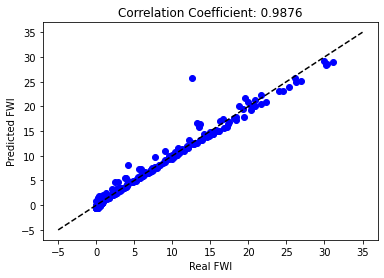

In [ ]:
# Plot model outputs
plt.scatter(y, pred, color="blue")
plt.plot([-5,35], [-5,35], color = 'black', ls = '--')
plt.xlabel("Real FWI")
plt.ylabel("Predicted FWI")
plt.title("Correlation Coefficient: %.4f" % np.corrcoef(y, pred)[0,1])
plt.show()

Text(0.5, 1.0, 'FWI Linear Regression Model')

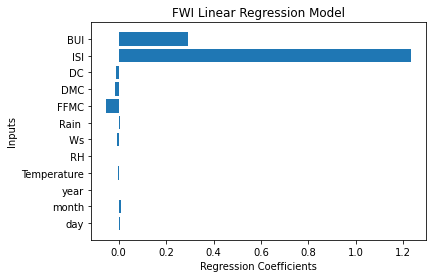

In [ ]:
# Correlation coefficients of inputs
plt.barh(col, regr.coef_, align='center')
plt.xlabel("Regression Coefficients")
plt.ylabel("Inputs")
plt.title("FWI Linear Regression Model")

Text(0.5, 1.0, 'Correlation Coefficient: 0.9229')

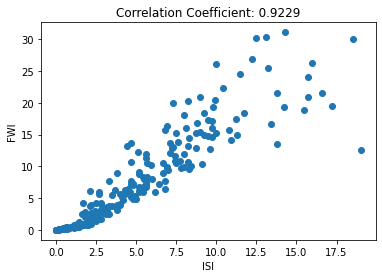

In [ ]:
plt.scatter(x[:,10],y)
plt.xlabel("ISI")
plt.ylabel("FWI")
plt.title("Correlation Coefficient: %.4f" % np.corrcoef(x[:,10], y)[0,1])

Text(0.5, 1.0, 'Correlation Coefficient: 0.8580')

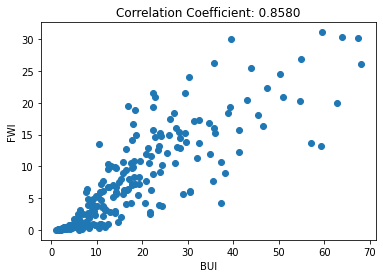

In [ ]:
plt.scatter(x[:,11],y)
plt.xlabel("BUI")
plt.ylabel("FWI")
plt.title("Correlation Coefficient: %.4f" % np.corrcoef(x[:,11], y)[0,1])

Text(0.5, 1.0, 'Correlation Coefficient: 0.0324')

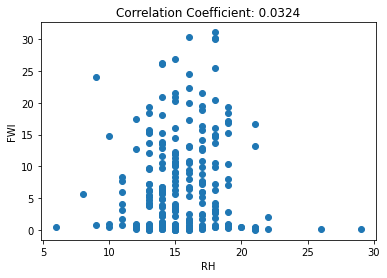

In [ ]:
plt.scatter(x[:,5],y)
plt.xlabel("RH")
plt.ylabel("FWI")
plt.title("Correlation Coefficient: %.4f" % np.corrcoef(x[:,5], y)[0,1])